In [1]:
%matplotlib inline
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['target'] = boston['target']
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(boston['data'], boston['target'], test_size=0.1)

In [19]:
# fit
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=6)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6)

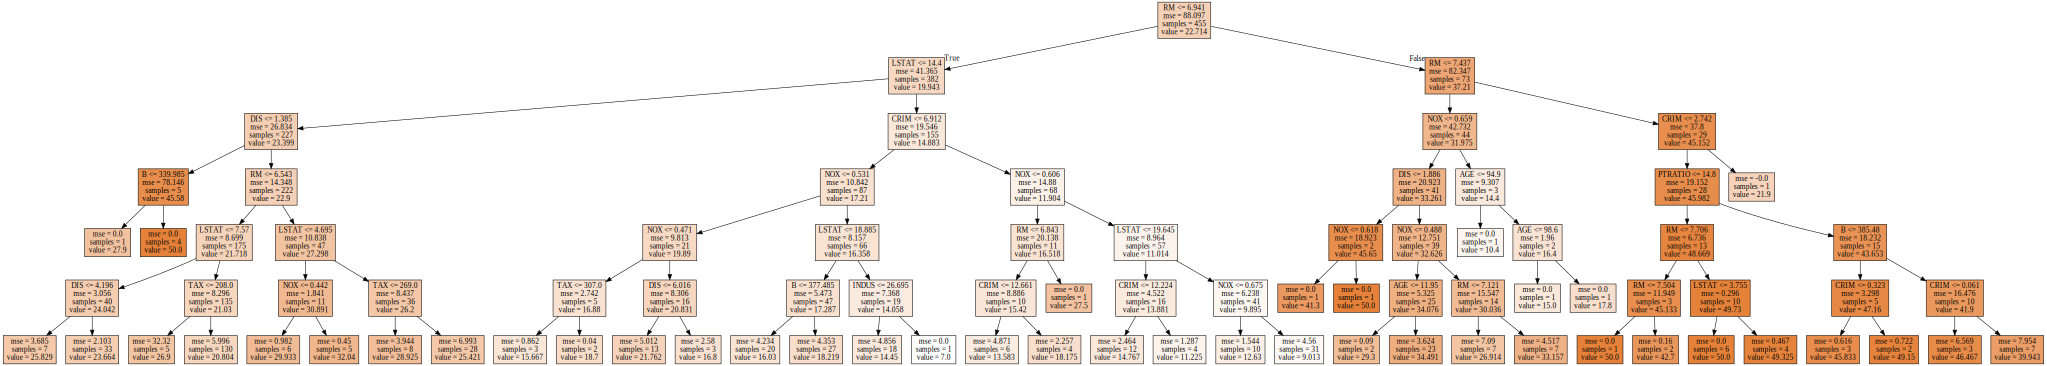

In [20]:
from sklearn.tree import export_graphviz
import graphviz

g = export_graphviz(reg, 
                    out_file=None, 
                    feature_names=boston["feature_names"],
                    filled=True)
graph = graphviz.Source(g)
graph

In [21]:
pre = reg.predict(x_test)
print('predict: ', list(pre))
print('reality: ', list(y_test))

predict:  [14.766666666666667, 25.421428571428574, 50.0, 20.803846153846155, 23.663636363636368, 20.803846153846155, 28.925, 20.803846153846155, 18.175, 25.828571428571426, 25.421428571428574, 18.21851851851852, 20.803846153846155, 20.803846153846155, 34.491304347826095, 18.21851851851852, 29.933333333333337, 20.803846153846155, 25.421428571428574, 14.766666666666667, 20.803846153846155, 14.449999999999998, 20.803846153846155, 18.21851851851852, 14.449999999999998, 9.012903225806452, 20.803846153846155, 21.76153846153846, 34.491304347826095, 18.21851851851852, 7.0, 20.803846153846155, 14.449999999999998, 20.803846153846155, 25.421428571428574, 20.803846153846155, 9.012903225806452, 32.04, 15.666666666666666, 20.803846153846155, 15.666666666666666, 20.803846153846155, 20.803846153846155, 16.03, 14.766666666666667, 20.803846153846155, 25.421428571428574, 14.449999999999998, 20.803846153846155, 9.012903225806452, 23.663636363636368]
reality:  [15.4, 29.0, 43.5, 21.1, 22.2, 19.3, 35.1, 23.

In [22]:
from sklearn.metrics import r2_score

print("r2 score:", r2_score(y_test, pre))

r2 score: 0.8212808327776633
